In [2]:
import jpype

jpype.startJVM(jpype.getDefaultJVMPath())

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import rfft, rfftfreq
from scipy.signal import get_window, find_peaks
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
import pickle as pkl
import os
from decimal import Decimal

# Individual Chirps

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

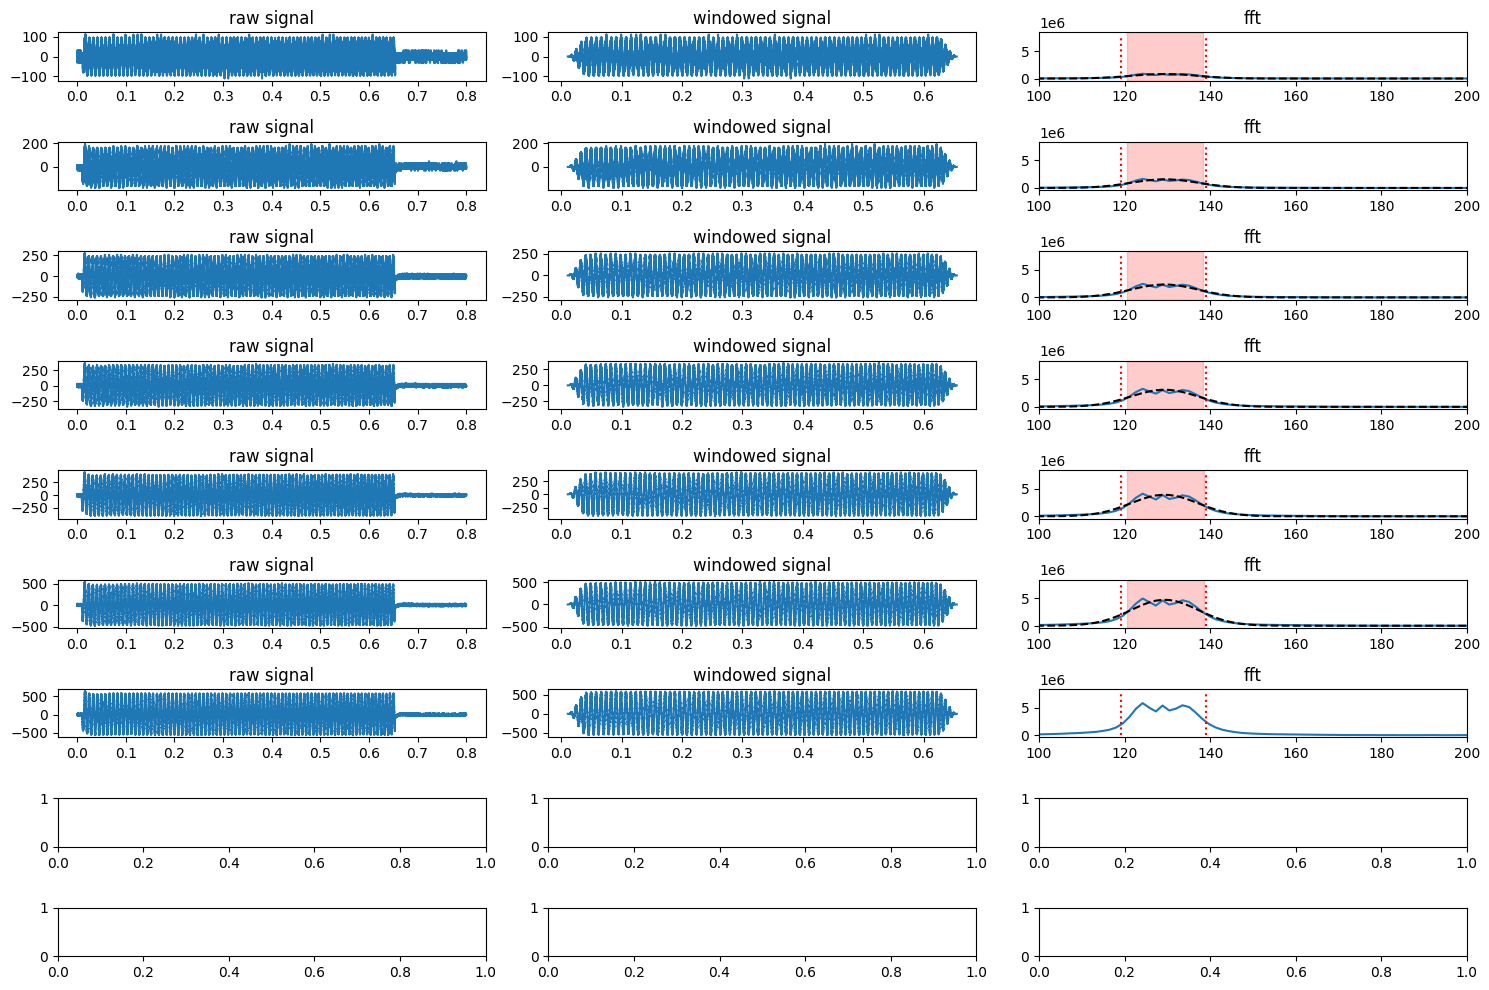

In [4]:
DIR = '../results/2022-11-17T14:58:53'
# - Gain scan from 0.1 to 1
#     - `2022-11-17T14:58:53`
#     - 500 Acqs at 1ms
#     - Chirp .3 to .35
#     - OASIS showing one single chirp, 80us/div, 625V/div
files = os.listdir(DIR)

initial = pkl.load(open(f"{DIR}/initial.pkl", 'rb'))

scope0_files = [f for f in files if 'scope_0' in f]
scope1_files = [f for f in files if 'scope_1' in f]
scope0_files.sort(key=lambda f: f.split('T')[1])
scope1_files.sort(key=lambda f: f.split('T')[1])

scope0 = []
scope1 = []

for f in scope0_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope0.append(pkl.load(f))
for f in scope1_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope1.append(pkl.load(f))


fig, ax = plt.subplots(len(scope0), 3, figsize=(15, 10), tight_layout=True)

for i, s in enumerate(scope1):
    time = np.array(s['data']['time']) * 1e-6
    voltage = np.array(s['data']['value']) / 10000 * 625
    ax[i, 0].plot(time, voltage)
    ax[i, 0].set_title("raw signal")

    time_window = time[1100:65500]
    voltage_window = voltage[1100:65500] * get_window(('tukey', 1e-1), len(time_window))
    ax[i, 1].plot(time_window, voltage_window)
    ax[i, 1].set_title("windowed signal")

    vfft = rfft(voltage_window)
    tfft = np.array(rfftfreq(len(time_window), time_window[1] - time_window[0]))
    ax[i, 2].plot(tfft, np.abs(vfft))
    ax[i, 2].set_xlim(100, 200)
    ax[i, 2].vlines(119.1, 0, 8e6, linestyles=':', colors='r')
    ax[i, 2].vlines(138.95, 0, 8e6, linestyles=':', colors='r')
    ax[i, 2].set_title("fft")

    def gauss(x, H, A, x0, sigma):
        return H + A * np.exp(-(x - x0)**2 / (2 * sigma**2))

    param, cov = curve_fit(gauss, tfft, np.abs(vfft))
    ax[i, 2].plot(tfft, gauss(tfft, *param), 'k--')

    # plot fwhm
    spline = UnivariateSpline(tfft, np.abs(vfft) - param[1]/2, s=0)
    r1, r2 = spline.roots()
    ax[i, 2].axvspan(r1, r2, alpha=0.2, color='r')

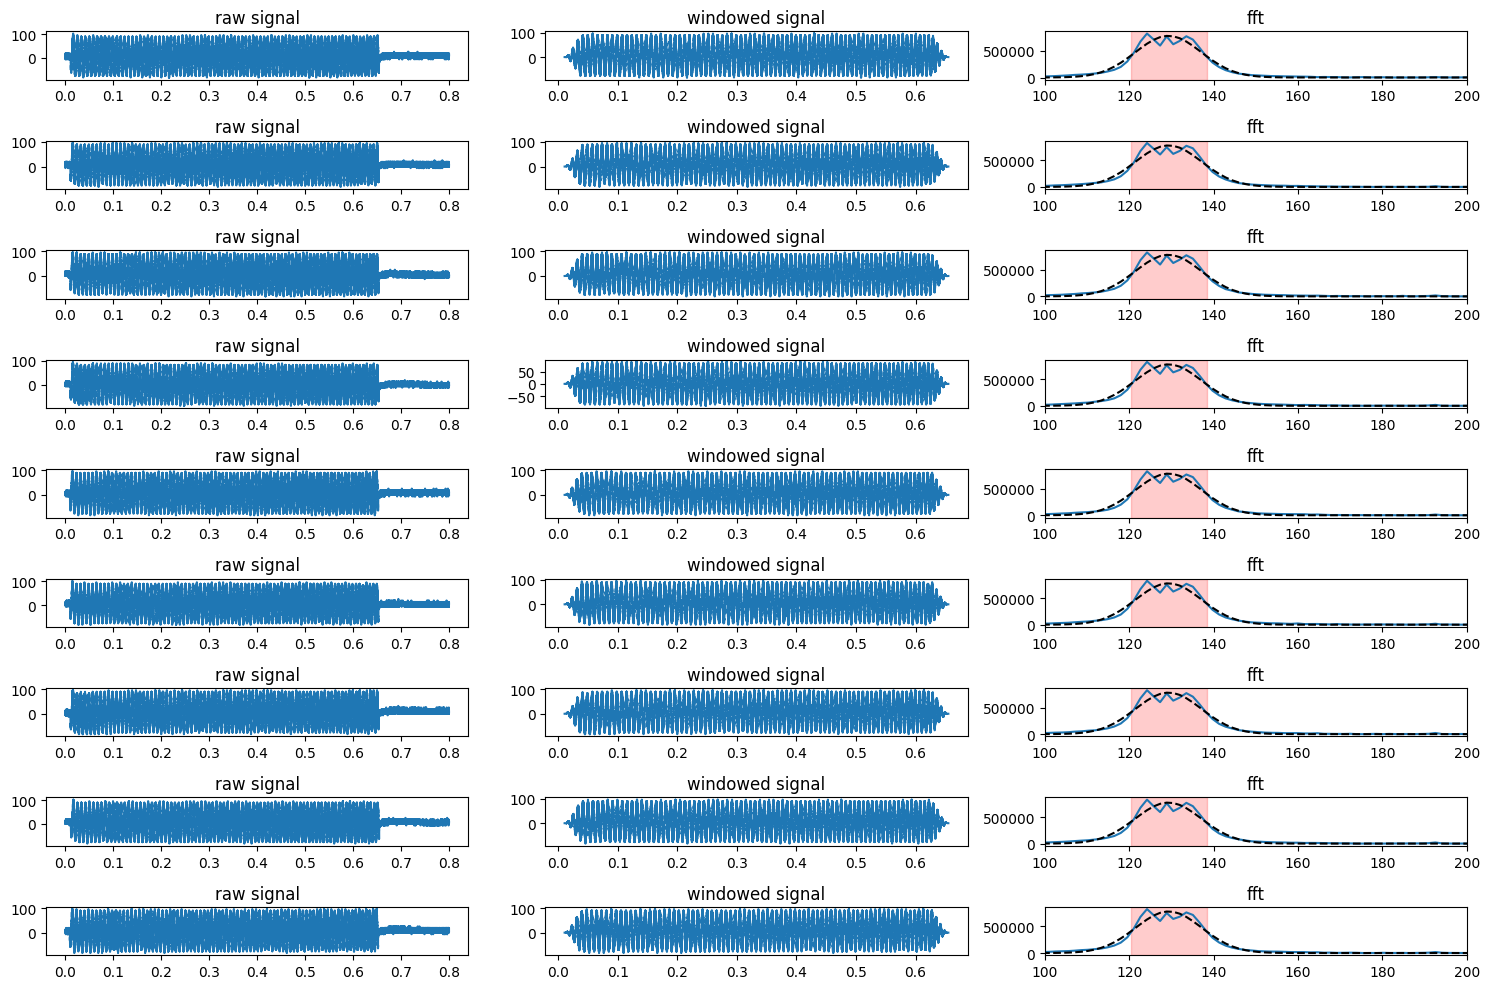

In [5]:
DIR='../results/2022-11-17T12:12:54.043774'
# - Interval scan from 1ms to 10ms in steps of 1ms
#     - `2022-11-17T12:12:54.043774`
#     - 0.1 Gain
#     - .3-.35 chirp
#     - 500 acq
#     - 256 turns
#     - Scope looking at one chirp, 250V/div, 80us/div
#     - Scope at 1260
files = os.listdir(DIR)

initial = pkl.load(open(f"{DIR}/initial.pkl", 'rb'))

scope0_files = [f for f in files if 'scope_0' in f]
scope1_files = [f for f in files if 'scope_1' in f]
scope0_files.sort(key=lambda f: f.split('T')[1])
scope1_files.sort(key=lambda f: f.split('T')[1])

scope0 = []
scope1 = []

for f in scope0_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope0.append(pkl.load(f))
for f in scope1_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope1.append(pkl.load(f))


fig, ax = plt.subplots(len(scope0), 3, figsize=(15, 10), tight_layout=True)

for i, s in enumerate(scope1):
    time = np.array(s['data']['time']) * 1e-6
    voltage = np.array(s['data']['value']) / 10000 * 250
    ax[i, 0].plot(time, voltage)
    ax[i, 0].set_title("raw signal")

    time_window = time[1100:65500]
    voltage_window = voltage[1100:65500] * get_window(('tukey', 1e-1), len(time_window))
    ax[i, 1].plot(time_window, voltage_window)
    ax[i, 1].set_title("windowed signal")

    vfft = rfft(voltage_window)
    tfft = rfftfreq(len(time_window), time_window[1] - time_window[0])
    ax[i, 2].plot(tfft, np.abs(vfft))
    ax[i, 2].set_xlim(100, 200)
    ax[i, 2].set_title("fft")

    def gauss(x, H, A, x0, sigma):
        return H + A * np.exp(-(x - x0)**2 / (2 * sigma**2))

    param, cov = curve_fit(gauss, tfft, np.abs(vfft))
    ax[i, 2].plot(tfft, gauss(tfft, *param), 'k--')

    # plot fwhm
    spline = UnivariateSpline(tfft, np.abs(vfft) - param[1]/2, s=0)
    roots = [r for r in spline.roots() if r > 1]
    ax[i, 2].axvspan(roots[0], roots[-1], alpha=0.2, color='r')

# Whole Excitation

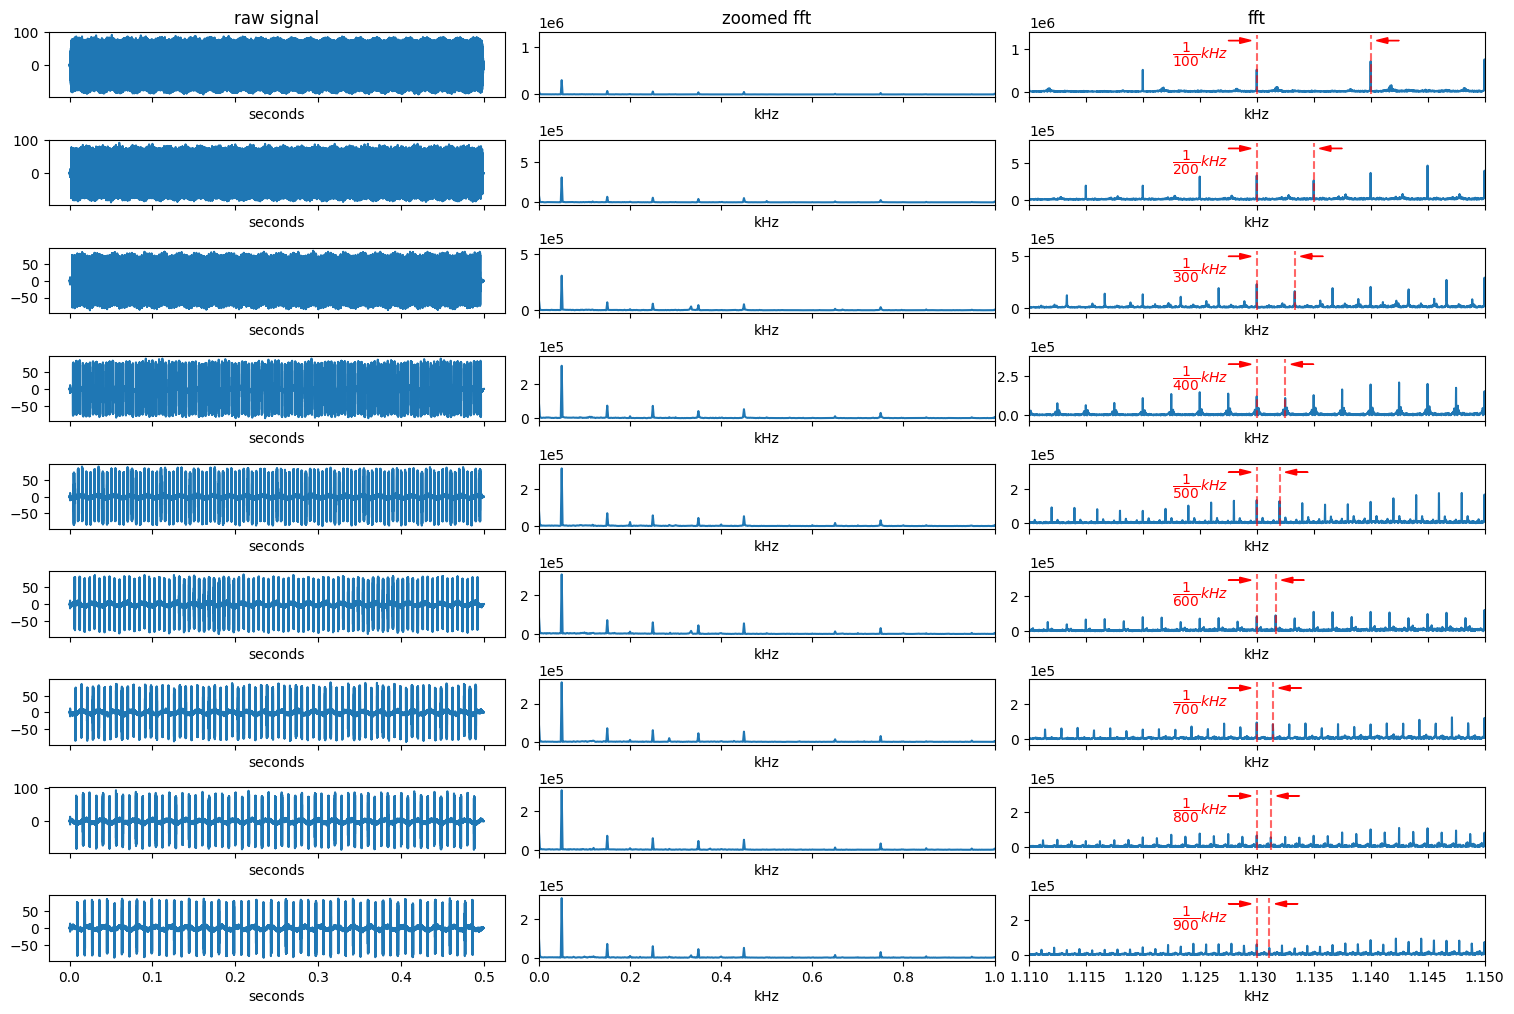

In [6]:
DIR = '../results/2022-11-17T12:27:29.119159'
files = os.listdir(DIR)

initial = pkl.load(open(f"{DIR}/initial.pkl", 'rb'))

scope0_files = [f for f in files if 'scope_0' in f]
scope1_files = [f for f in files if 'scope_1' in f]
scope0_files.sort(key=lambda f: f.split('T')[1])
scope1_files.sort(key=lambda f: f.split('T')[1])

scope0 = []
scope1 = []

for f in scope0_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope0.append(pkl.load(f))
for f in scope1_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope1.append(pkl.load(f))

fig, ax = plt.subplots(len(scope0), 3, figsize=(15, 10), sharex='col')

for i, s in enumerate(scope1):
    time = np.array(s['data']['time']) * 1e-9
    voltage = np.array(s['data']['value']) / 10000 * 62.5
    #ax[i, 0].plot(time, voltage)
    #ax[i, 0].set_ylabel(f"${initial['param_space'][i]}ms$", rotation=0, labelpad=10)
    #ax[i, 0].set_xlabel("seconds")

    time_window = time
    voltage_window = voltage * get_window(('tukey', 1e-2), len(time_window))
    ax[i, 0].plot(time_window, voltage_window)
    ax[i, 0].set_xlabel("seconds")

    vfft = rfft(voltage_window)
    tfft = rfftfreq(len(time_window), time_window[1] - time_window[0])

    ax[i, 1].plot(tfft, np.abs(vfft))
    #ax[i, 1].set_xlim(100e3, 125e3)
    ax[i, 1].set_xlim(0, 1000)
    ax[i, 1].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    ax[i, 1].ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
    tx = ax[i, 1].xaxis.get_offset_text()
    tx.set_visible(False)
    ax[i, 1].set_xlabel("kHz")

    ax[i, 2].plot(tfft, np.abs(vfft))
    ax[i, 2].set_xlim(111e3, 115e3)
    ax[i, 2].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    ax[i, 2].ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
    tx = ax[i, 2].xaxis.get_offset_text()
    tx.set_visible(False)
    ax[i, 2].set_xlabel("kHz")
    
    intv = (1/(initial['param_space'][i]*1e-3)) # interval in Hz

    ylim = ax[i, 2].get_ylim()
    ax[i, 2].vlines(1.13e5, ylim[0], ylim[1], color='r', linestyle='--', alpha=0.6)
    ax[i, 2].vlines(1.13e5+intv, ylim[0], ylim[1], color='r', linestyle='--', alpha=0.6)

    ax[i, 2].arrow(112750, ylim[1]*0.9, 200, 0, length_includes_head=True, head_width=ylim[1]*0.1, head_length=100, color='r')
    ax[i, 2].arrow(1.13e5+intv+250, ylim[1]*0.9, -200, 0, length_includes_head=True, head_width=ylim[1]*0.1, head_length=100, color='r')

    ax[i, 2].text(112750, ylim[1]*0.9, r"$\dfrac{1}{"+f"{(initial['param_space'][i]*100):g}" +r"}kHz$", ha='right', va='top', color='r')

    
ax[0, 0].set_title("raw signal")
ax[0, 1].set_title("zoomed fft")
ax[0, 2].set_title("fft")

fig.tight_layout(pad=0.2)

# Changing Chirp

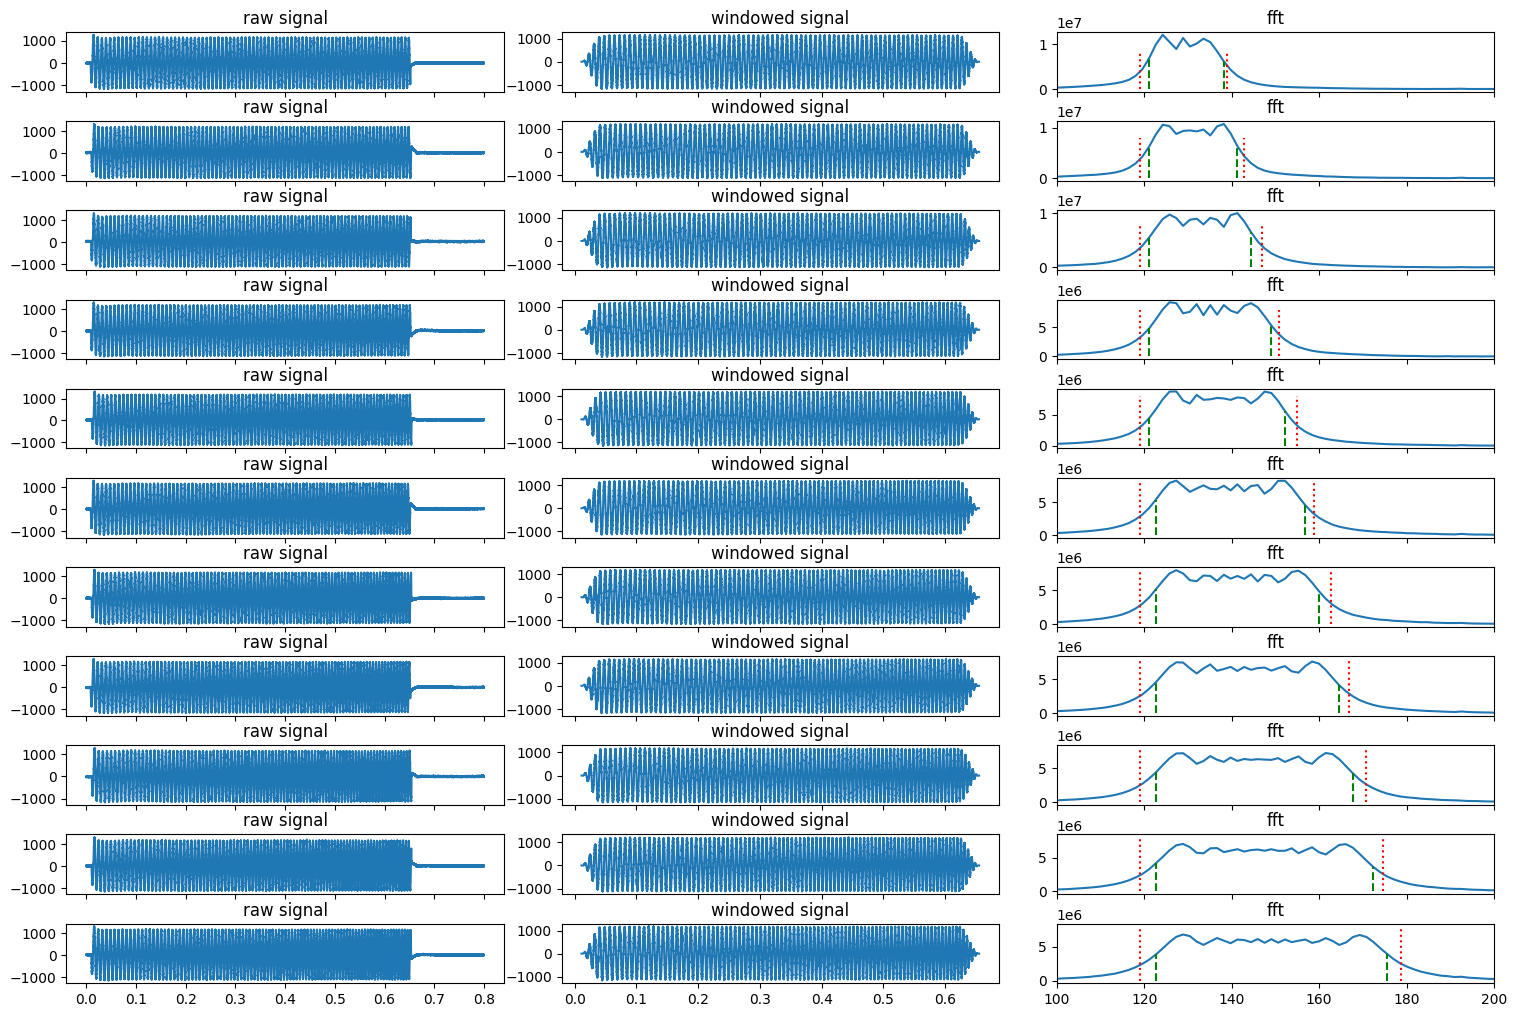

In [7]:
DIR = '../results/2022-11-17T16:07:11'
files = os.listdir(DIR)

initial = pkl.load(open(f"{DIR}/initial.pkl", 'rb'))

scope0_files = [f for f in files if 'scope_0' in f]
scope1_files = [f for f in files if 'scope_1' in f]
scope0_files.sort(key=lambda f: f.split('T')[1])
scope1_files.sort(key=lambda f: f.split('T')[1])

scope0 = []
scope1 = []

for f in scope0_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope0.append(pkl.load(f))
for f in scope1_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope1.append(pkl.load(f))


fig, ax = plt.subplots(len(scope0), 3, figsize=(15, 10), tight_layout=True, sharex='col')

for i, s in enumerate(scope1):
    time = np.array(s['data']['time']) * 1e-6
    voltage = np.array(s['data']['value']) / 10000 * 625
    ax[i, 0].plot(time, voltage)
    ax[i, 0].set_title("raw signal")

    time_window = time[1100:65500]
    voltage_window = voltage[1100:65500] * get_window(('tukey', 1e-1), len(time_window))
    ax[i, 1].plot(time_window, voltage_window)
    ax[i, 1].set_title("windowed signal")

    vfft = rfft(voltage_window)
    tfft = rfftfreq(len(time_window), time_window[1] - time_window[0])
    ax[i, 2].plot(tfft, np.abs(vfft))
    ax[i, 2].set_xlim(100, 200)
    ax[i, 2].vlines(397*0.3, 0, 8e6, linestyles=':', colors='r')
    ax[i, 2].vlines(397*initial['param_space'][i], 0, 8e6, linestyles=':', colors='r')
    ax[i, 2].set_title("fft")

    def gauss(x, H, A, x0, sigma):
        return H + A * np.exp(-(x - x0)**2 / (2 * sigma**2))

    half_max = max(np.abs(vfft)) / 2
    idx = np.where(np.abs(vfft) > half_max)[0]
    ax[i, 2].vlines(tfft[idx[0]], 0, np.abs(vfft)[idx[0]], linestyles='--', colors='g')
    ax[i, 2].vlines(tfft[idx[-1]], 0, np.abs(vfft)[idx[-1]], linestyles='--', colors='g')
fig.tight_layout(pad=0.1)

# Spectrogram

/var/folders/q6/pm7mcbgn2m3cs67hqk4fvgf40000gn/T/ipykernel_59616/679002524.py:25: UserWarning: shading value 'viridis' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(t, f, Sxx, shading='viridis')


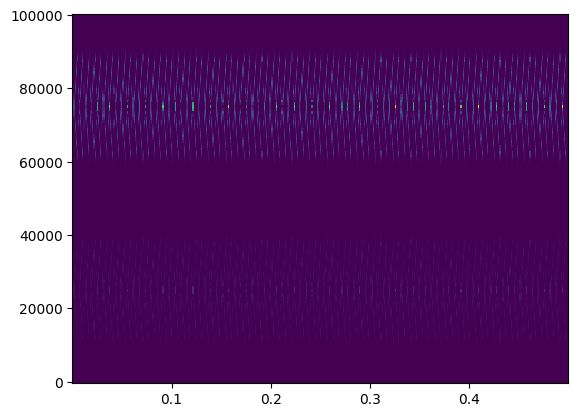

In [58]:
from scipy.signal import spectrogram

DIR = '../results/2022-11-23T10:36:24'
files = os.listdir(DIR)

initial = pkl.load(open(f"{DIR}/initial.pkl", 'rb'))

scope0_files = [f for f in files if 'scope_0' in f]
scope1_files = [f for f in files if 'scope_1' in f]
scope0_files.sort(key=lambda f: f.split('T')[1])
scope1_files.sort(key=lambda f: f.split('T')[1])

scope0 = []
scope1 = []

for f in scope0_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope0.append(pkl.load(f))
for f in scope1_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope1.append(pkl.load(f))


f, t, Sxx = spectrogram(scope1[0]['data']['value'], 200000, window='tukey')
plt.pcolormesh(t, f, Sxx, shading='viridis')


In [57]:
# 100000 data points
len(scope1[0]['data']['value'])
# 500000000.0 = half a second

100000

# Hilbert

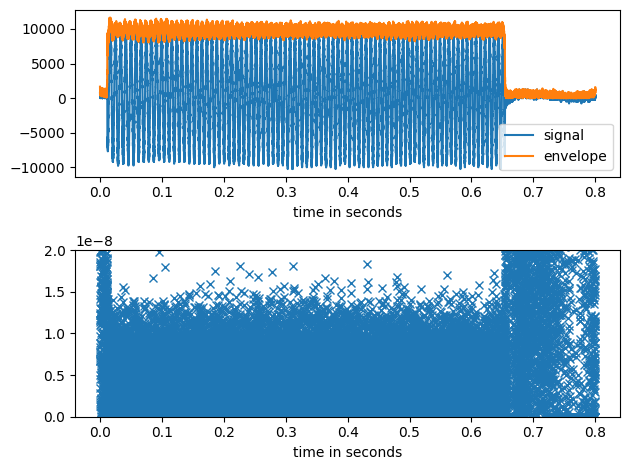

In [50]:
from scipy.signal import hilbert

DIR = '../results/2022-11-22T11:28:50'
files = os.listdir(DIR)

initial = pkl.load(open(f"{DIR}/initial.pkl", 'rb'))

scope0_files = [f for f in files if 'scope_0' in f]
scope1_files = [f for f in files if 'scope_1' in f]
scope0_files.sort(key=lambda f: f.split('T')[1])
scope1_files.sort(key=lambda f: f.split('T')[1])

scope0 = []
scope1 = []

for f in scope0_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope0.append(pkl.load(f))
for f in scope1_files[1:]:
    with open(f"{DIR}/{f}", 'rb') as f:
        scope1.append(pkl.load(f))

signal = scope1[0]['data']['value']
time = np.array(scope1[0]['data']['time']) * 1e-6
        
analytic_signal = hilbert(scope1[0]['data']['value'])
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * 1e-6)

fig, (ax0, ax1) = plt.subplots(nrows=2, tight_layout=True)
ax0.plot(time, scope1[0]['data']['value'], label='signal')
ax0.plot(time, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1.plot(time[1:], np.abs(instantaneous_frequency), 'x')
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0, 2e-8)
fig.tight_layout()

